In [6]:
%matplotlib inline
import json
from matplotlib import pyplot as plt
import numpy as np

### Exact solution to shocktube

In [2]:
exact_v_x = [-0.5,-0.2,0,0.4,0.4,0.5]
exact_v_y = [0,0,1,1,0,0]

exact_e_x = [-0.5,-0.2,0,0.2, 0.2,0.4,0.4,0.5]
exact_e_y = [2.5,2.5,1.75,1.75,2.75,2.75,2,2]

exact_rho_x = [-0.5,-0.2,0,0.2,0.2,0.4,0.4,0.5]
exact_rho_y = [1,1,0.4,0.4,0.22,0.22, 0.175, 0.175]

exact_p_x = [-0.5,-0.2,0,0.4,0.4,0.5]
exact_p_y = [1, 1, 0.3, 0.3, 0.1, 0.1]

### Shocktube with Continuity equation and no boundary support

Text(0.5,1,'Parameter : v')

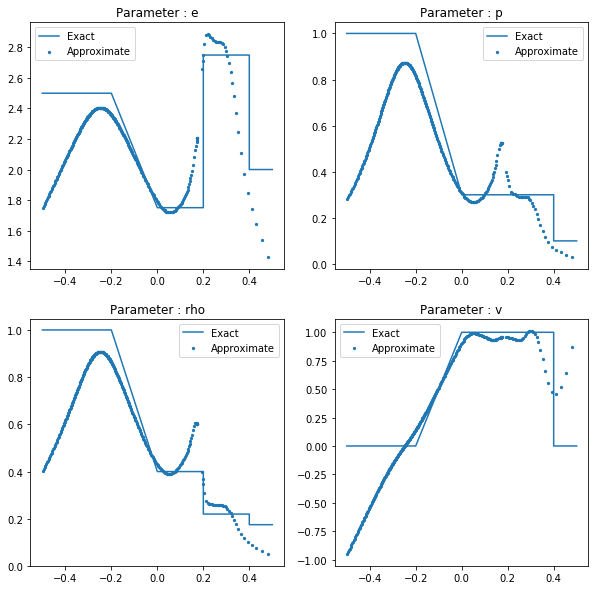

In [9]:

with open('shocktube_CE_no_boundary.json', 'r') as shock1:
    data = json.load(shock1)
    
for key in data.keys():
    data[key] = np.array(data[key])
    
fig, ax = plt.subplots(2,2, figsize=(10,10))

mask = np.where(abs(np.array(data['x'])) <= 0.5)
mask = mask[0]

ax[0,0].plot(exact_e_x, exact_e_y)
ax[0,0].scatter(data['x'][mask], data['e'][mask], s=5)
ax[0,0].legend(['Exact', 'Approximate'])
ax[0,0].set_title('Parameter : e')

ax[0,1].plot(exact_p_x, exact_p_y)
ax[0,1].scatter(data['x'][mask], data['p'][mask], s=5)
ax[0,1].legend(['Exact', 'Approximate'])
ax[0,1].set_title('Parameter : p')

ax[1,0].plot(exact_rho_x, exact_rho_y)
ax[1,0].scatter(data['x'][mask], data['rho'][mask], s=5)
ax[1,0].legend(['Exact', 'Approximate'])
ax[1,0].set_title('Parameter : rho')

ax[1,1].plot(exact_v_x, exact_v_y)
ax[1,1].scatter(data['x'][mask], data['v'][mask], s=5)
ax[1,1].legend(['Exact', 'Approximate'])
ax[1,1].set_title('Parameter : v')

### Shocktube with Summation Density and 3 particles from both edges with freezed properties

Text(0.5,1,'Parameter : v')

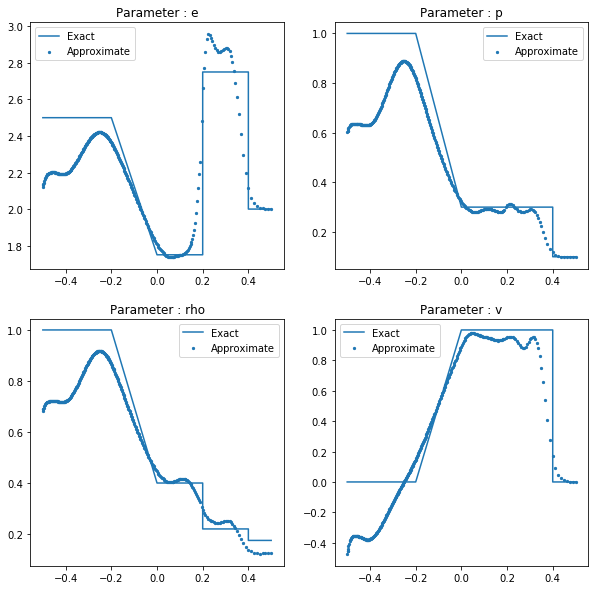

In [10]:

with open('shocktube_SD_with_boundary.json', 'r') as shock2:
    data = json.load(shock2)
    
for key in data.keys():
    data[key] = np.array(data[key])
    
fig, ax = plt.subplots(2,2, figsize=(10,10))

mask = np.where(abs(np.array(data['x'])) <= 0.5)
mask = mask[0]

ax[0,0].plot(exact_e_x, exact_e_y)
ax[0,0].scatter(data['x'][mask], data['e'][mask], s=5)
ax[0,0].legend(['Exact', 'Approximate'])
ax[0,0].set_title('Parameter : e')

ax[0,1].plot(exact_p_x, exact_p_y)
ax[0,1].scatter(data['x'][mask], data['p'][mask], s=5)
ax[0,1].legend(['Exact', 'Approximate'])
ax[0,1].set_title('Parameter : p')

ax[1,0].plot(exact_rho_x, exact_rho_y)
ax[1,0].scatter(data['x'][mask], data['rho'][mask], s=5)
ax[1,0].legend(['Exact', 'Approximate'])
ax[1,0].set_title('Parameter : rho')

ax[1,1].plot(exact_v_x, exact_v_y)
ax[1,1].scatter(data['x'][mask], data['v'][mask], s=5)
ax[1,1].legend(['Exact', 'Approximate'])
ax[1,1].set_title('Parameter : v')

The problem here is that particles leak from the left end. 
Need to find a way to deal with the boundaries. 
In continuity equation, there are no boundaries whatsoever
In summation density case, the first three and the last three particles 
have freezed property parameters. 
XSPH velocity is implemented. Still, there is leakage. 

The density at the far left end is 1 and it remains 1, however for some reason
the particles still exit. Maybe need to implement a solid boundary with a higher density 
rather than using simulation particles as ghosts. 

Next simulation will be with epsilon = 1
